# Analisis Insertion Sort untuk Sorting Harga Tiket


## Pendahuluan
Studi kasus ini berfokus pada pengurutan data tiket penerbangan dari Indonesia ke Turki berdasarkan harga tiket dalam urutan **dari mahal ke murah**. Algoritma yang digunakan adalah **Insertion Sort**, yang diimplementasikan dalam dua versi: iteratif dan rekursif. Dataset yang digunakan memiliki **10.000 entri**.

Tujuan utama adalah untuk memahami efisiensi algoritma Insertion Sort pada dataset besar.



## Dataset
Dataset terdiri dari informasi berikut:
- **Airline**: Nama maskapai.
- **Flight Code**: Kode penerbangan unik.
- **Price**: Harga tiket dalam Rupiah.

Dataset berisi 10.000 entri. Berikut adalah cuplikan dataset:


In [10]:
import sys
sys.setrecursionlimit(20000)
import pandas as pd

# Load dataset
dataset_path = '/content/indo_turkey_flight_tickets.csv'
df = pd.read_csv(dataset_path)
df.head()


,Airline,Flight Code,Price
0,Saudi Arabian Airlines,SV8487,4105216
1,Turkish Airlines,TK8036,6886559
2,Turkish Airlines,TK6032,16924587
3,Malaysia Airlines,MH5996,8644941
4,Turkish Airlines,TK3717,15642429



## Implementasi Algoritma Insertion Sort
### Versi Iteratif


In [11]:

def insertion_sort_iterative(data):
    for i in range(1, len(data)):
        key = data[i]
        j = i - 1
        while j >= 0 and key["Price"] > data[j]["Price"]:  # Sort from expensive to cheap
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key
    return data



### Versi Rekursif


In [12]:

def insertion_sort_recursive(data, n=None):
    if n is None:
        n = len(data)
    if n <= 1:
        return data

    # Recursion for the first n-1 element
    insertion_sort_recursive(data, n - 1)

    # Insert the last element in the correct position
    last = data[n - 1]
    j = n - 2
    while j >= 0 and last["Price"] > data[j]["Price"]:
        data[j + 1] = data[j]
        j -= 1
    data[j + 1] = last
    return data



## Analisis dan Visualisasi
Waktu eksekusi dihitung untuk dataset dengan berbagai ukuran. Hasilnya divisualisasikan dalam bentuk grafik.


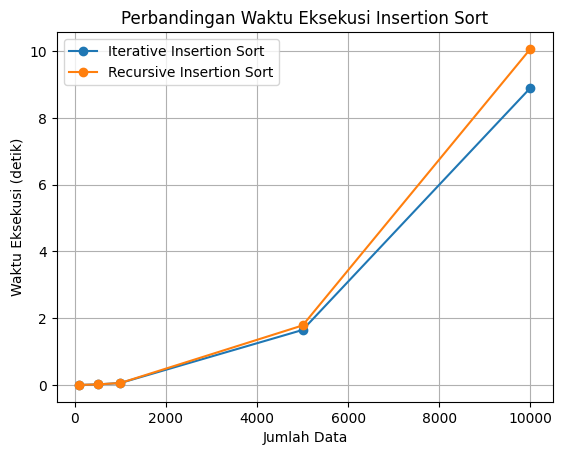

In [13]:

import time
import matplotlib.pyplot as plt

# Function to measure execution time
def measure_time(func, data):
    start_time = time.time()
    func(data.copy())
    return time.time() - start_time

# Test sizes
sizes = [100, 500, 1000, 5000, 10000]
iterative_times = []
recursive_times = []

for size in sizes:
    test_data = df.sample(size).to_dict("records")

    # Measure iterative time
    iterative_times.append(measure_time(insertion_sort_iterative, test_data))

    # Measure recursive time
    recursive_times.append(measure_time(insertion_sort_recursive, test_data))

# Plot results
plt.plot(sizes, iterative_times, label="Iterative Insertion Sort", marker="o")
plt.plot(sizes, recursive_times, label="Recursive Insertion Sort", marker="o")
plt.xlabel("Jumlah Data")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Waktu Eksekusi Insertion Sort")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Create a DataFrame with the runtime data
data = {'Size': sizes,
        'Iterative Time': iterative_times,
        'Recursive Time': recursive_times}
runtime_df = pd.DataFrame(data)

# Display the DataFrame
runtime_df

,Size,Iterative Time,Recursive Time
0,100,0.000455,0.000700
1,500,0.015822,0.015286
2,1000,0.057791,0.058853
3,5000,1.647894,1.783266
4,10000,8.898821,10.067806



## Kesimpulan
Hasil eksperimen menunjukkan bahwa:
1. **Insertion Sort Iteratif** lebih cepat dan efisien dibandingkan versi rekursif pada dataset besar.
2. Versi rekursif mengalami overhead tambahan dari penggunaan stack rekursi.

**Rekomendasi**: Untuk dataset besar, gunakan versi iteratif untuk efisiensi optimal.
